<br/>

## <div style="padding:10px;background-color:#9d5a47;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 10px;overflow:hidden;font-weight:50;width:auto">Sony Churn Project - Data Ingestion</div>

In [2]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
np.random.seed(42)
rng = np.random.default_rng(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pathlib import Path
data_path = Path('./data')



In [6]:
df = pd.read_csv(data_path / "Data_Science_Challenge.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Basic Info

In [28]:
# check for nulls
df.isna().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [35]:
desc = df.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## Histograms for each column

In [16]:
plot_cols = df.columns.drop(["state", "area code", "phone number", "churn"])
display(plot_cols, len(plot_cols))

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

17

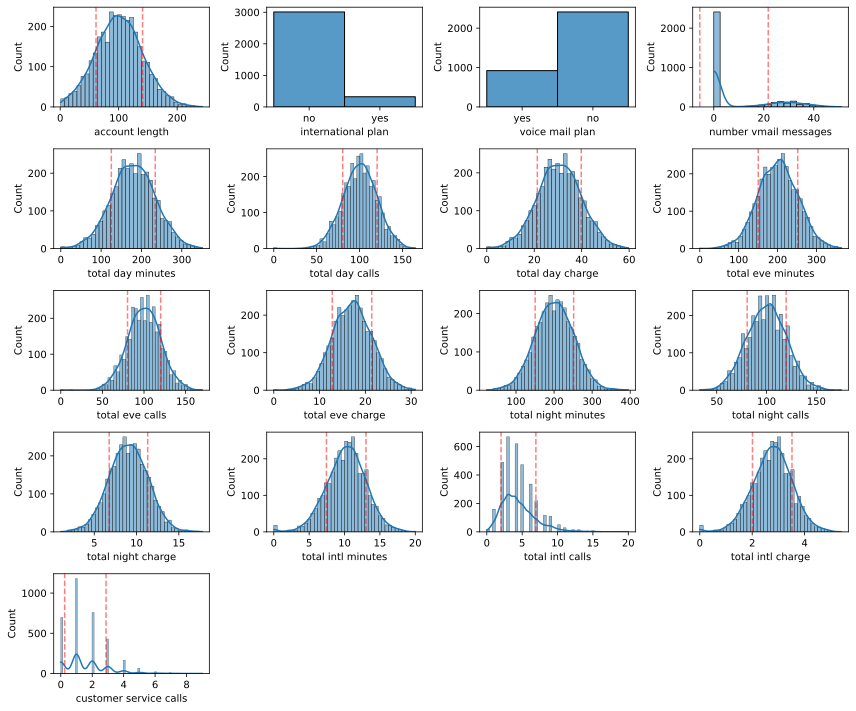

In [53]:
fig, ax = plt.subplots(5, 4, figsize=(12, 10))

# plot histograms
for i, col in enumerate(plot_cols):
    sns.histplot(
        df[col],
        ax=ax[i // 4, i % 4],
        kde=True if len(df[col].unique()) > 2 else False,
    )
    # plot vert line at -1 and + 1 std
    if col in desc.index:
        ax[i // 4, i % 4].axvline(
            desc.loc[col, "mean"] + desc.loc[col, "std"],
            color="red",
            linestyle="--",
            alpha=0.5,
        )
        ax[i // 4, i % 4].axvline(
            desc.loc[col, "mean"] - desc.loc[col, "std"],
            color="red",
            linestyle="--",
            alpha=0.5,
        )

# delete empty subplots
for j in range(i + 1, ax.size):
    ax[j // 4, j % 4].set_visible(False)

fig.tight_layout()
plt.show()

### Histogram Observations 

* Much of the data has normal distribution. 
* Of the binary columns, most people do not have international or vmail plans
  * Number of vmail messages has a strong left tail, but may be due to lack of vmail plans @todo check
* Some other charts like `total intl charge` also have data near zero that may be due to lack of an intl plan.

## Check Class Balance


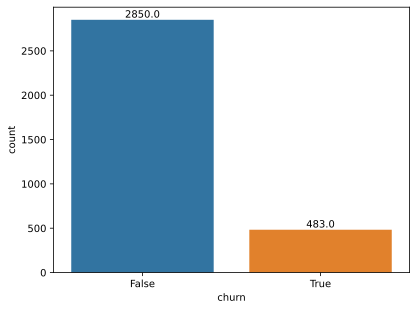

In [51]:
ax = sns.countplot(x="churn", data=df)
# Add actual values on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

### Class Balance Observations
Highly imbalanced - we will have to adjust for our classification models